![](https://miro.medium.com/max/1400/1*gYe2FMr9lKys2Wmo1v-s7A.jpeg)

# 1. Importing Libraries

In [1]:
import os
import cv2
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelBinarizer
from keras.applications.xception import Xception,preprocess_input
import tensorflow as tf
from keras.preprocessing import image
from keras.layers import Input
from keras.backend import reshape
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

# 2. Loading and Preprocessing of Data

In [2]:
images_dir = '../input/h-and-m-personalized-fashion-recommendations/images'

In [3]:
def getImagePaths(path):
    """
    Function to Combine Directory Path with individual Image Paths
    
    parameters: path(string) - Path of directory
    returns: image_names(string) - Full Image Path
    """
    image_names = []
    for dirname, _, filenames in os.walk(path):
        for filename in filenames:
            fullpath = os.path.join(dirname, filename)
            image_names.append(fullpath)
    return image_names

def preprocess_img(img_path):
    dsize = (225,225)
    new_image=cv2.imread(img_path)
    new_image=cv2.resize(new_image,dsize,interpolation=cv2.INTER_NEAREST)  
    new_image=np.expand_dims(new_image,axis=0)
    new_image=preprocess_input(new_image)
    return new_image

def load_data():
    output=[]
    output=getImagePaths(images_dir)[:10000]
    return output

# 3. Defining model and extracting feature for all the training data

In [4]:
def model():
    model=Xception(weights='imagenet',include_top=False)
    for layer in model.layers:
        layer.trainable=False
        #model.summary()
    return model

def feature_extraction(image_data,model):
    features=model.predict(image_data)
    features=np.array(features)
    features=features.flatten()
    return features

# 4. Finding the similar image through LSH and cosine similarity

In [5]:
def result_vector_cosine(model,feature_vector,new_img):
    new_feature = model.predict(new_img)
    new_feature = np.array(new_feature)
    new_feature = new_feature.flatten()
    N_result = 12
    nbrs = NearestNeighbors(n_neighbors=N_result, metric="cosine").fit(feature_vector)
    distances, indices = nbrs.kneighbors([new_feature])
    return(indices)

# 5. Result
## Vector Cosine

2022-02-08 22:27:29.458200: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-08 22:27:29.572418: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-08 22:27:29.573585: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-08 22:27:29.575429: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

83697664/83683744 [==============================] - 1s 0us/step


2022-02-08 22:27:35.130344: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2022-02-08 22:27:36.856747: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


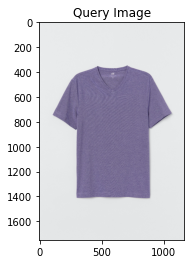

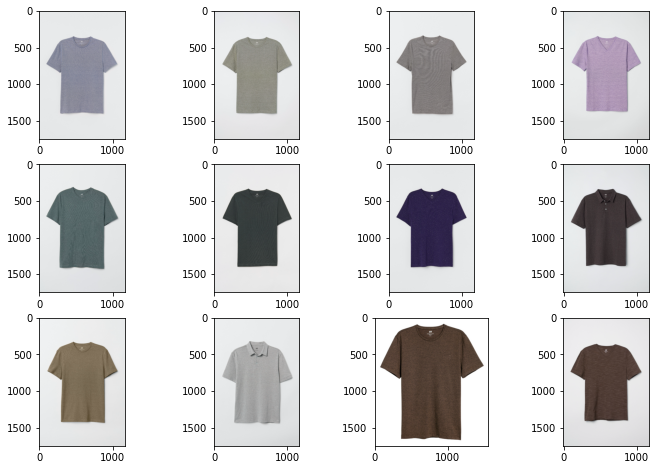

In [6]:
def input_show(data):
    plt.title("Query Image")
    plt.imshow(data)
  
def show_result(data,result):
    fig = plt.figure(figsize=(12,8))
    for i in range(0,12):
        index_result=result[0][i]
        plt.subplot(3,4,i+1)
        plt.imshow(cv2.imread(data[index_result]))
    plt.show()

def main():  
    features=[]
    output=load_data()
    main_model=model()
    #Limiting the data for training
    for i in output[:999]:
        new_img=preprocess_img(i)
        features.append(feature_extraction(new_img,main_model))
    feature_vec = np.array(features)
    result=result_vector_cosine(main_model,feature_vec,preprocess_img(output[1000]))
    input_show(cv2.imread(output[1000]))
    show_result(output,result)
  

if __name__=='__main__':
    main()